In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler,OneHotEncoder,PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [4]:
dataset = pd.read_csv('creditcard.zip')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
dataset[dataset.duplicated()].shape[0]

1081

In [13]:
data = dataset.drop_duplicates()

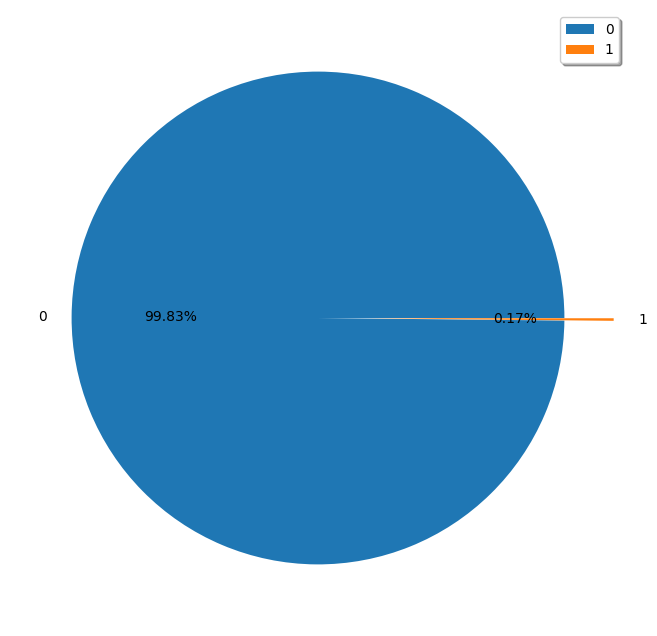

In [15]:
plt.figure(figsize=(10,8))
plt.pie(x=data.Class.value_counts().values,labels=data.Class.value_counts().index,explode=[0,0.2],autopct='%.2f%%')
plt.legend(shadow=True)
plt.show()

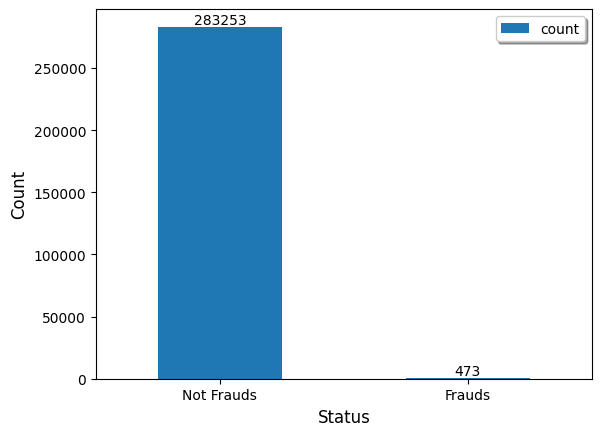

In [29]:
ax = data.Class.value_counts().plot(kind='bar',rot=0)
ax.set_xticklabels(['Not Frauds', 'Frauds'])
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.25,p.get_height()+1),verticalalignment='bottom',horizontalalignment='center')
plt.legend(shadow=True)
plt.xlabel('Status',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

# As We Can see Above The 2 Calsses are Imbalanced

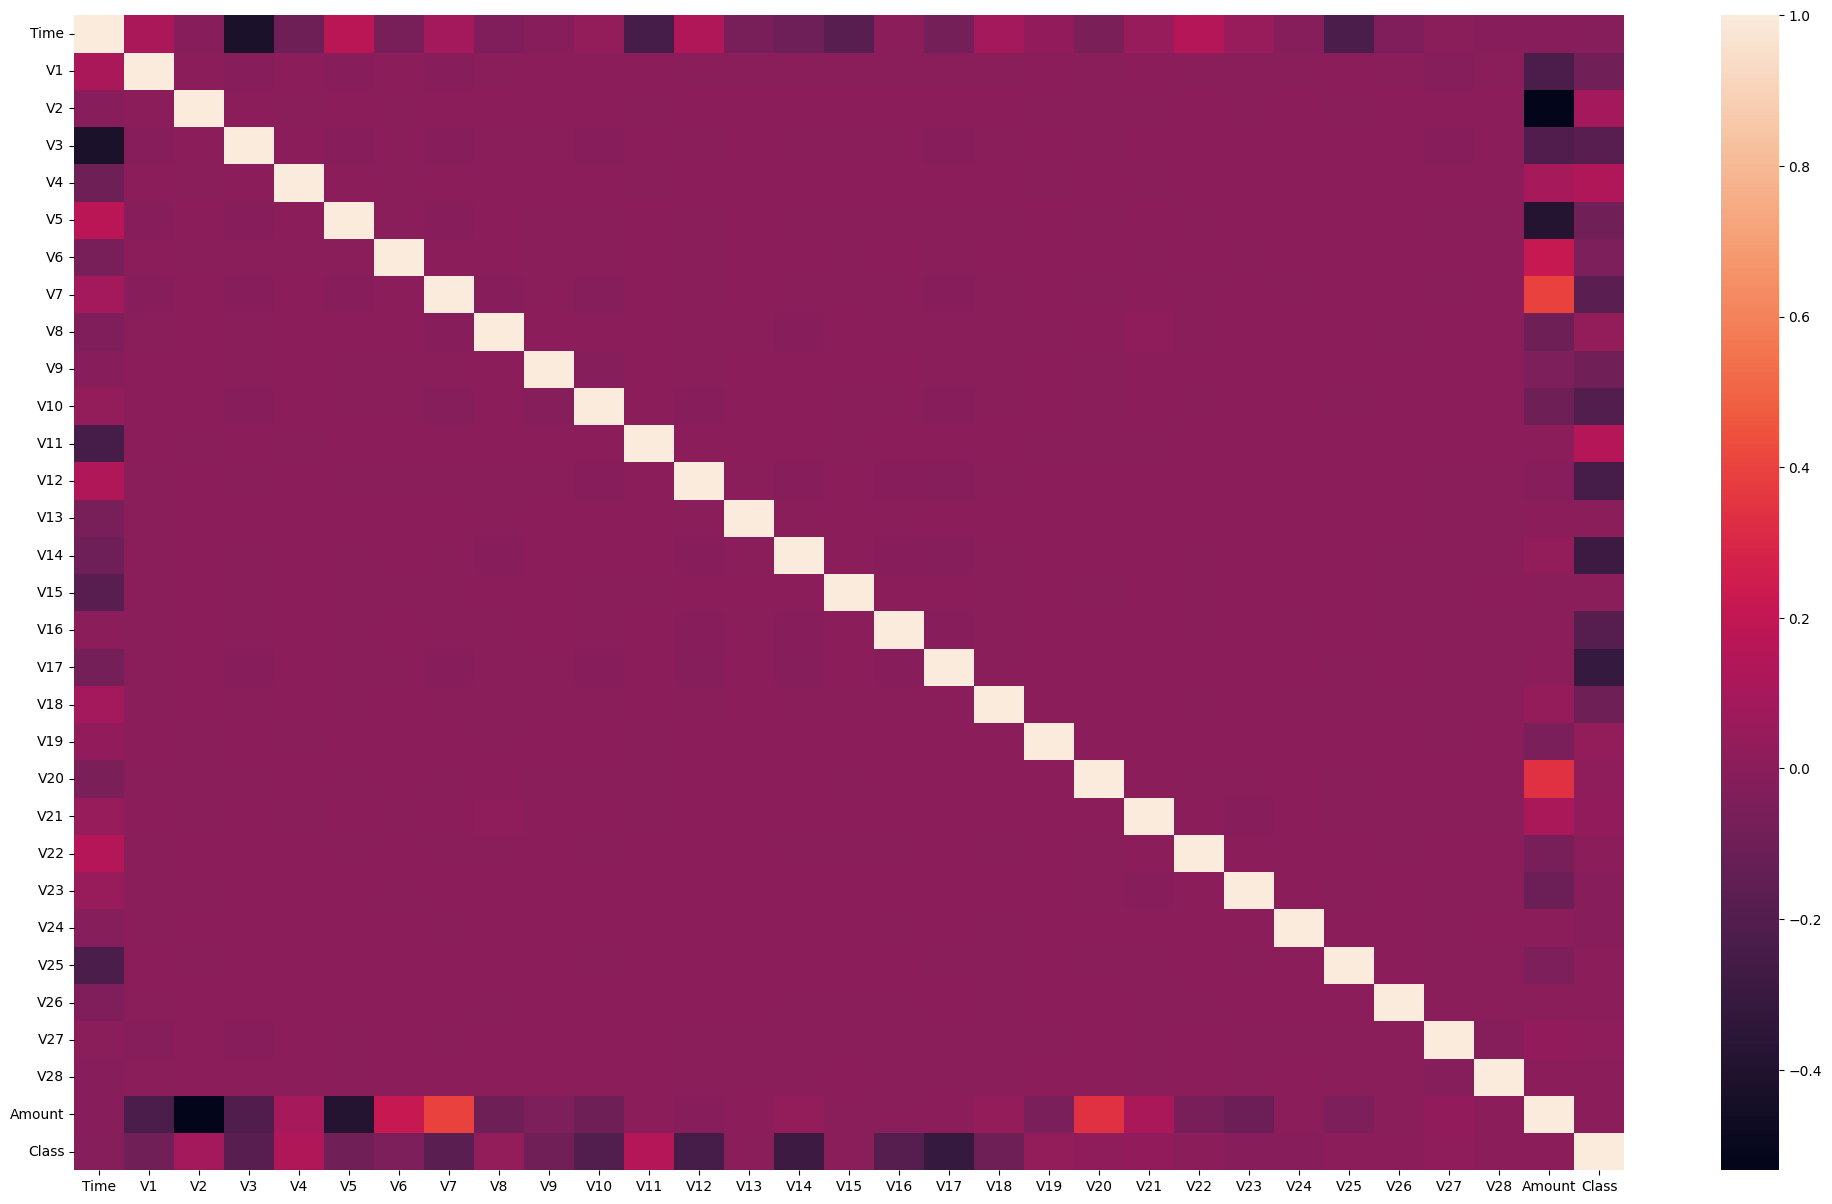

In [32]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr())
plt.show()

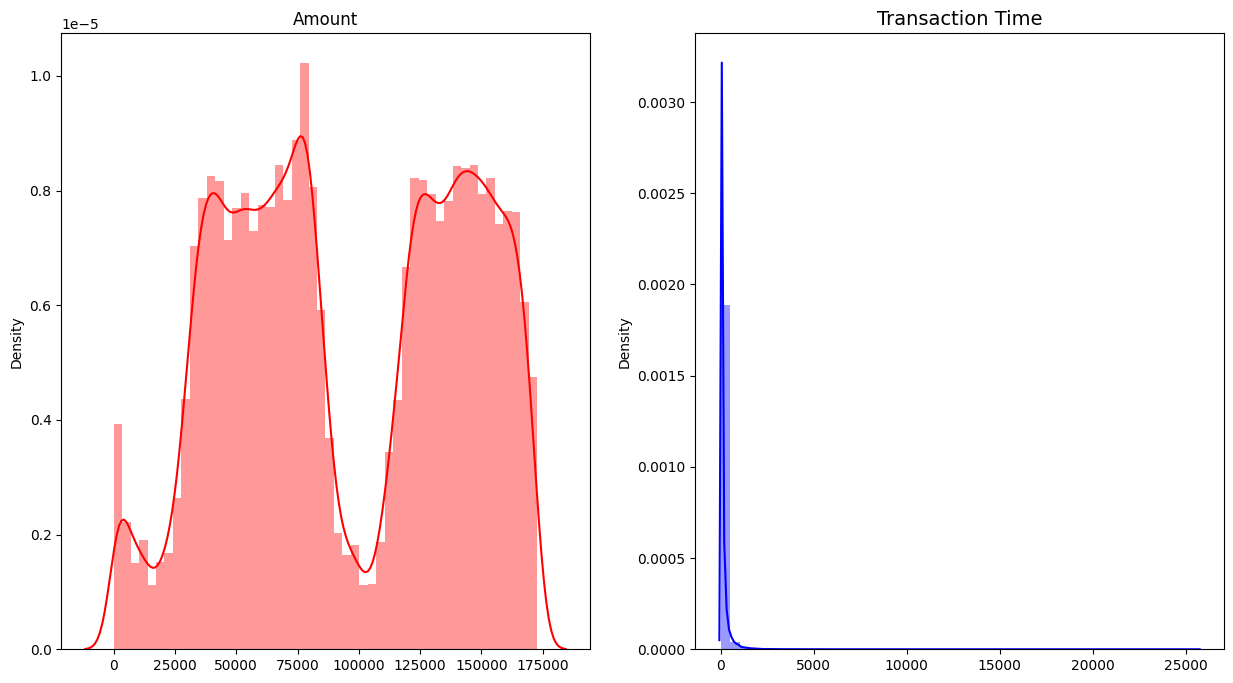

In [37]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
amount = data['Time'].values
time = data['Amount'].values
sns.distplot(amount,ax=ax[0],color='r')
ax[0].set_title('Amount',fontsize=12)
sns.distplot(time, ax=ax[1], color='b')
ax[1].set_title('Transaction Time', fontsize=14)
plt.show()

In [38]:
fraud = data[data['Class']==1]
not_fraud = data[data['Class']==0].sample(len(fraud))

In [40]:
fraud.shape[0]

473

In [41]:
not_fraud.shape[0]

473

In [42]:
df = pd.concat((fraud,not_fraud),axis=0,ignore_index=True)

In [43]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [44]:
# we have to shuffle our data
df = df.sample(frac=1,ignore_index=True)
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,42985.0,-4.075975,0.963031,-5.076070,4.955963,-0.161437,-2.832663,-7.619765,1.618895,-2.992092,...,1.030738,0.165328,-1.017502,-0.477983,-0.304987,-0.106089,1.899714,0.511462,1.00,1
1,144713.0,1.855550,-0.527523,-1.008947,0.222570,-0.371278,-0.700561,-0.029393,-0.098823,0.895709,...,-0.068332,-0.139137,0.167841,0.022134,-0.162539,-0.113713,-0.040769,-0.055188,71.38,0
2,67571.0,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,...,0.042619,0.397224,0.072229,-0.242276,0.560916,-0.540955,0.150606,-0.117140,549.06,1


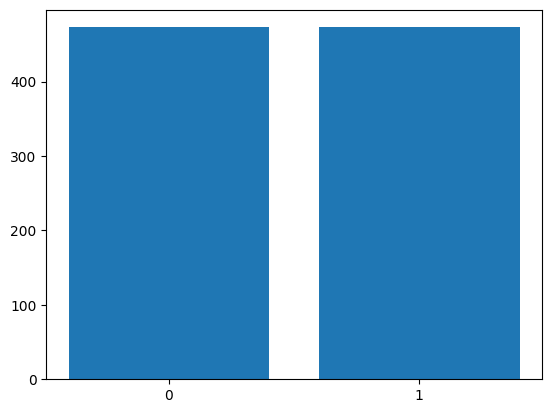

In [50]:
plt.bar(df.Class.value_counts().index,df.Class.value_counts().values)
plt.xticks([0,1])
plt.show()

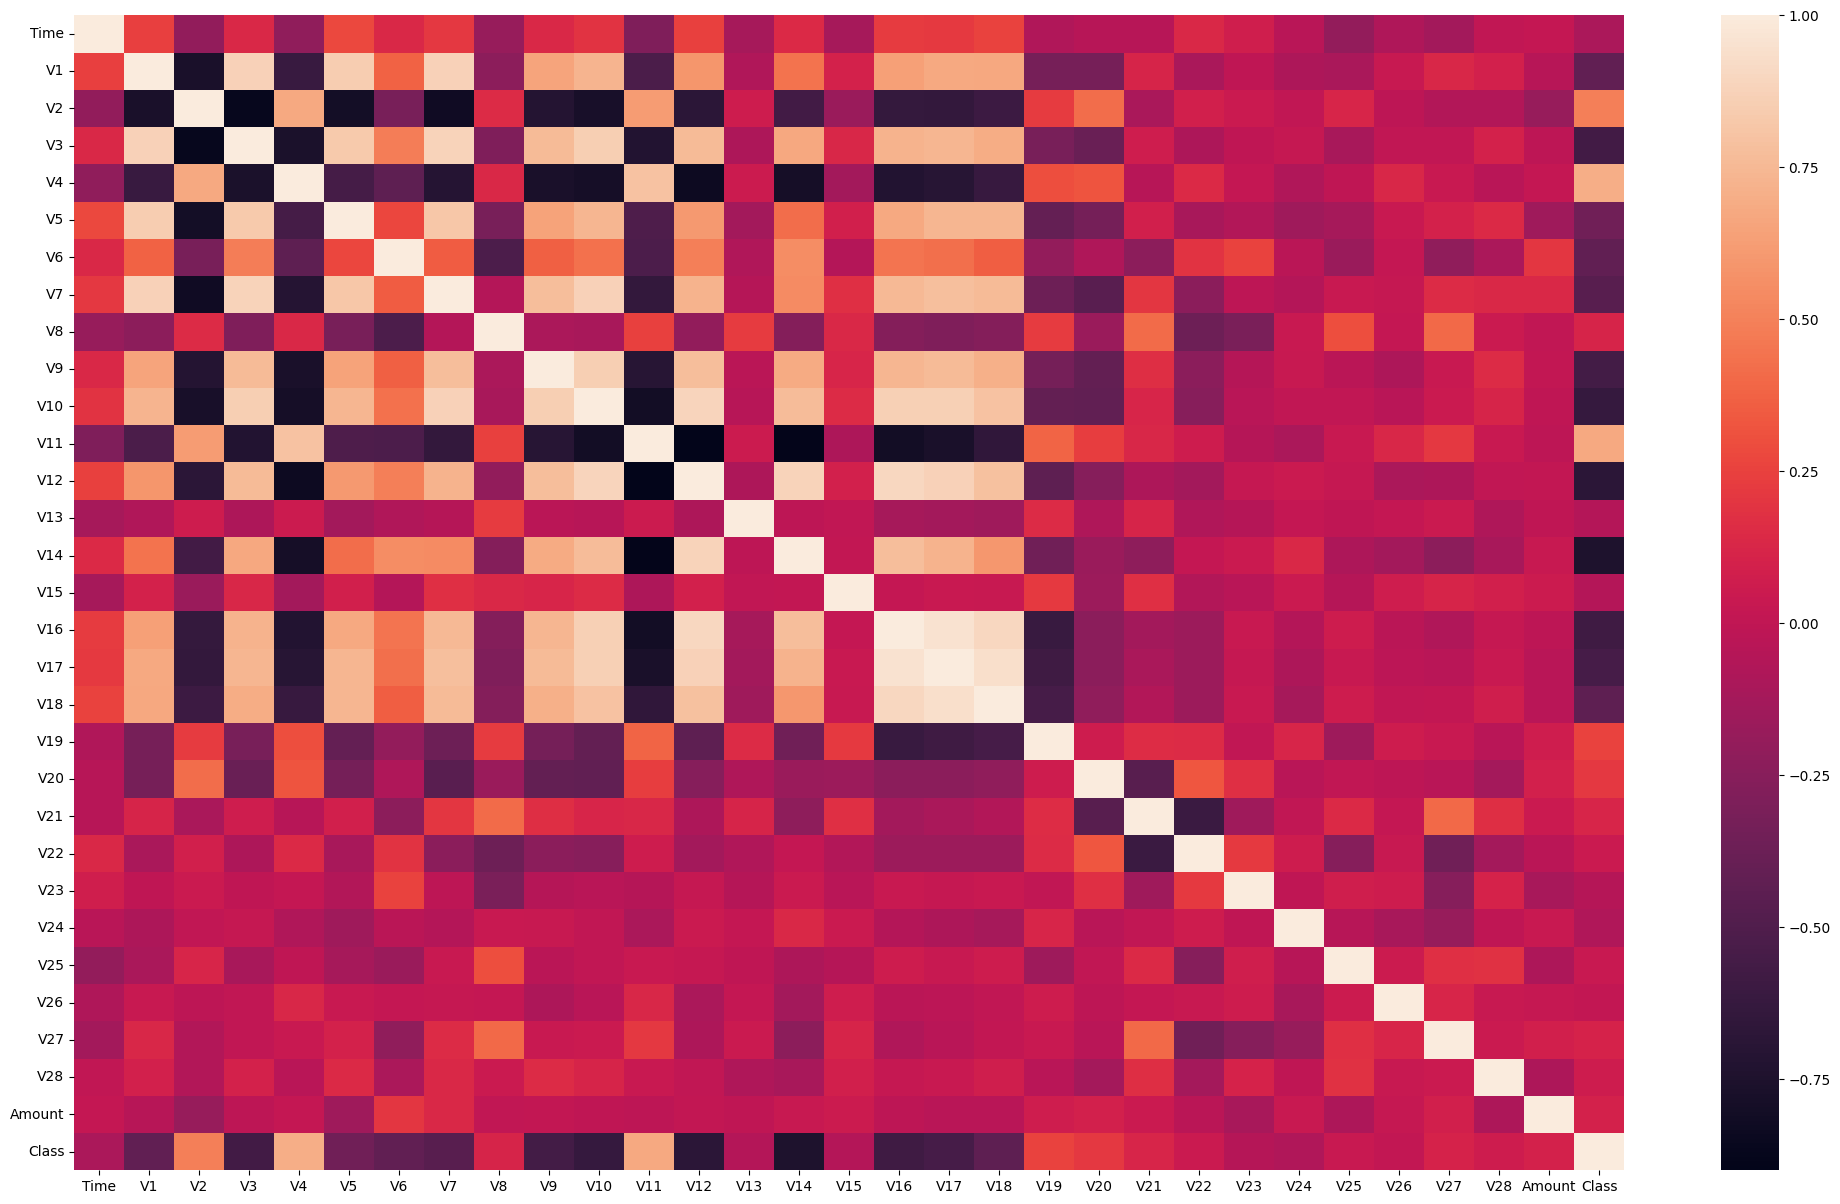

In [52]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr())
plt.show()

* As we can see v10, v12, v14, v16 are negatively correlated with Class column 
* v2, v4, v11, v19 are positively correlated 

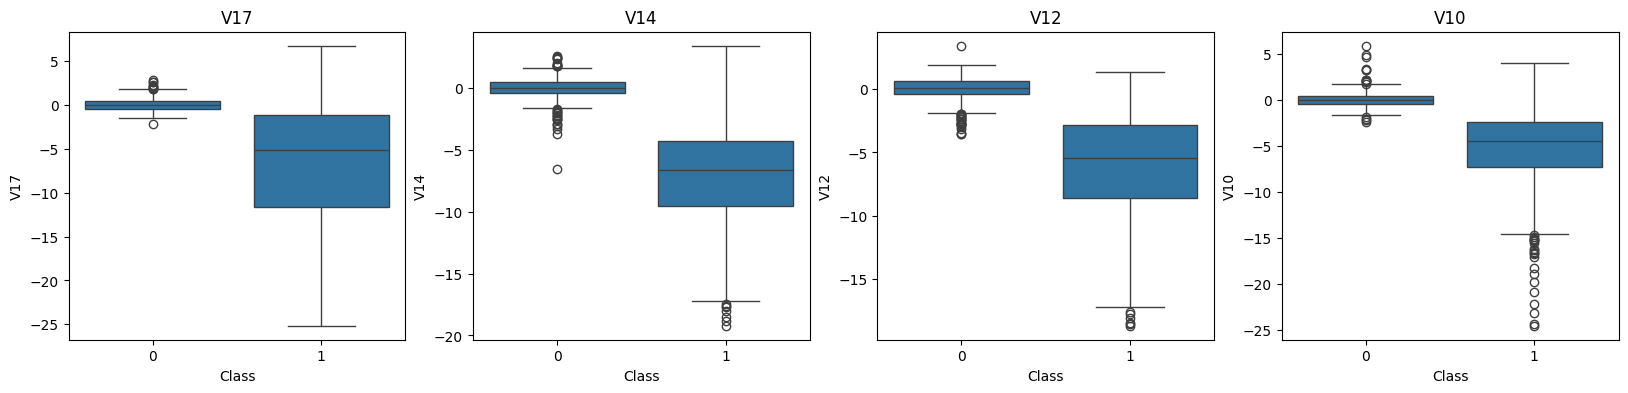

In [55]:
fig, ax = plt.subplots(1,4,figsize=(20,4))
sns.boxplot(x="Class", y="V17", data=df, ax=ax[0])
ax[0].set_title('V17')
sns.boxplot(x="Class", y="V14", data=df, ax=ax[1])
ax[1].set_title('V14')
sns.boxplot(x="Class", y="V12", data=df, ax=ax[2])
ax[2].set_title('V12')
sns.boxplot(x="Class", y="V10", data=df, ax=ax[3])
ax[3].set_title('V10')
plt.show()

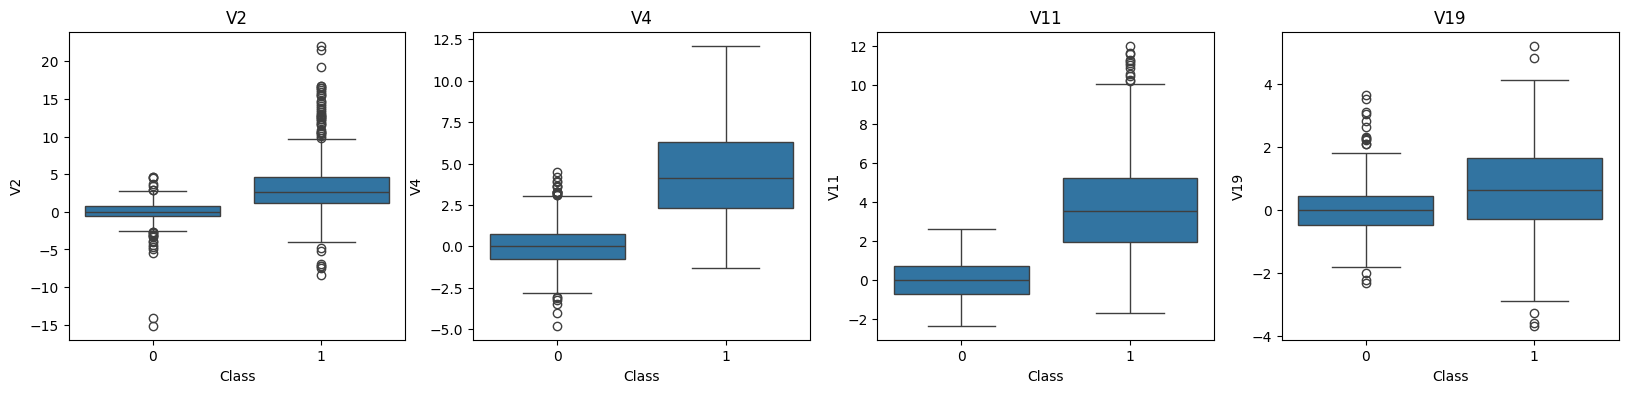

In [56]:
fig, ax = plt.subplots(1,4,figsize=(20,4))
sns.boxplot(x="Class", y="V2", data=df, ax=ax[0])
ax[0].set_title('V2')
sns.boxplot(x="Class", y="V4", data=df, ax=ax[1])
ax[1].set_title('V4')
sns.boxplot(x="Class", y="V11", data=df, ax=ax[2])
ax[2].set_title('V11')
sns.boxplot(x="Class", y="V19", data=df, ax=ax[3])
ax[3].set_title('V19')
plt.show()

In [59]:
sc = StandardScaler()
df['Time_scaled'] = sc.fit_transform(df[['Time']])

In [60]:
df['Amount'] = sc.fit_transform(df[['Amount']])

In [61]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_scaled
0,42985.0,-4.075975,0.963031,-5.076070,4.955963,-0.161437,-2.832663,-7.619765,1.618895,-2.992092,...,0.165328,-1.017502,-0.477983,-0.304987,-0.106089,1.899714,0.511462,-0.432918,1,-0.869145
1,144713.0,1.855550,-0.527523,-1.008947,0.222570,-0.371278,-0.700561,-0.029393,-0.098823,0.895709,...,-0.139137,0.167841,0.022134,-0.162539,-0.113713,-0.040769,-0.055188,-0.130027,0,1.240306
2,67571.0,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,...,0.397224,0.072229,-0.242276,0.560916,-0.540955,0.150606,-0.117140,1.925737,1,-0.359325
3,94141.0,-13.512074,8.215177,-16.582606,6.207369,-11.318472,-2.997207,-17.640470,0.040349,-5.620232,...,1.514028,-0.141879,0.789186,-0.031343,-0.255057,-1.865831,-0.442204,-0.241492,1,0.191635
4,77496.0,1.098437,-0.214530,0.434134,1.190161,0.046202,1.280153,-0.468660,0.383965,0.685033,...,0.012378,-0.255231,-1.123620,0.728669,-0.205980,0.062148,0.005929,-0.269379,0,-0.153518


In [62]:
df.drop('Time',inplace=True,axis=1)

In [63]:
x = df.drop('Class',axis=1)
y = df['Class']

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [93]:
def kfold(model,model_name):
    c_val = cross_val_score(model,x_train,y_train,cv=10)
    print(f"Cross Validation Score of {model_name} is: {c_val.mean()}")

def train(model,model_name):
    model.fit(x_train,y_train)
    trsc = model.score(x_train,y_train)
    tsc = model.score(x_test,y_test)
    print(f'{model_name}:\nTraining Score: {trsc}\nTesting Score: {tsc}')

def conf_matrix(model):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt='.3g')

def report(model):
    y_pred = model.predict(x_test)
    cp = classification_report(y_test,y_pred)
    print(cp)

def roc(model,model_name):
    y_pred = model.decision_function(x_test)
    fp,tp,_ = roc_curve(y_test,y_pred)
    auc_sv = auc(fp,tp)
    plt.plot(fp,tp,color='k',label=f'{model_name}: (auc = %0.3f)' % auc_sv)
    plt.plot([0,1],[0,1],color='red',linestyle='--')
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.legend()
    plt.show()

In [82]:
lg = LogisticRegression()

In [83]:
kfold(lg,'Logistic Regression')

Cross Validation Score of Logistic Regression is: 0.9336418511066398


In [84]:
train(lg,'Logistic Regression')

Logistic Regression:
Training Score: 0.9548660084626234
Testing Score: 0.9409282700421941


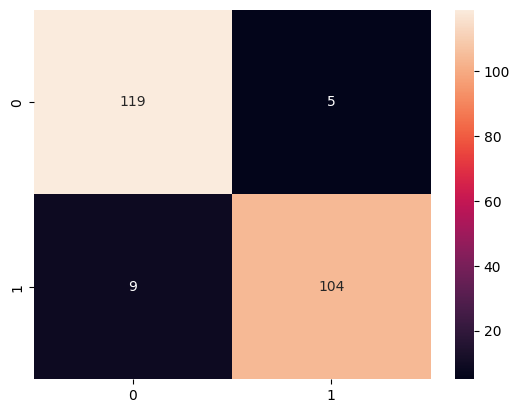

In [85]:
conf_matrix(lg)

In [86]:
report(lg)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       124
           1       0.95      0.92      0.94       113

    accuracy                           0.94       237
   macro avg       0.94      0.94      0.94       237
weighted avg       0.94      0.94      0.94       237



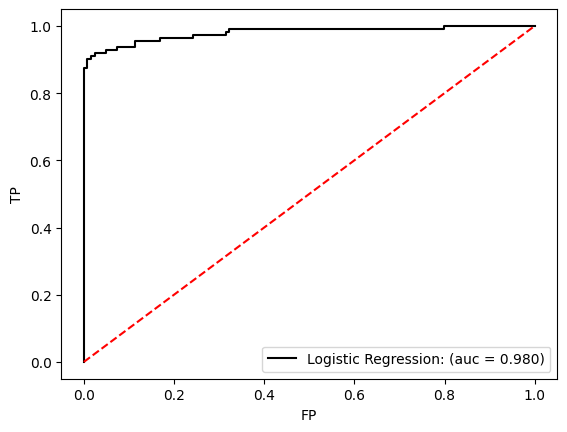

In [94]:
roc(lg,'Logistic Regression')

In [95]:
dt = DecisionTreeClassifier()

In [97]:
kfold(dt,'Decision Tree')

Cross Validation Score of Decision Tree is: 0.8913682092555332


In [98]:
train(dt,'Decision Tree')

Decision Tree:
Training Score: 1.0
Testing Score: 0.9282700421940928


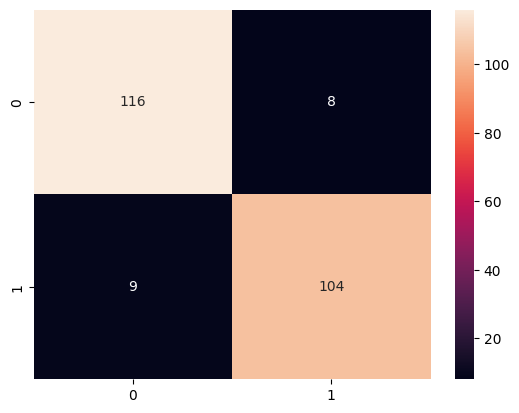

In [99]:
conf_matrix(dt)

In [100]:
report(dt)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       124
           1       0.93      0.92      0.92       113

    accuracy                           0.93       237
   macro avg       0.93      0.93      0.93       237
weighted avg       0.93      0.93      0.93       237



In [102]:
rf = RandomForestClassifier(n_estimators=120,max_depth=30)

In [104]:
kfold(rf,'Random Forest')

Cross Validation Score of Random Forest is: 0.9251911468812878


In [105]:
train(rf,'Random Forest')

Random Forest:
Training Score: 1.0
Testing Score: 0.9535864978902954


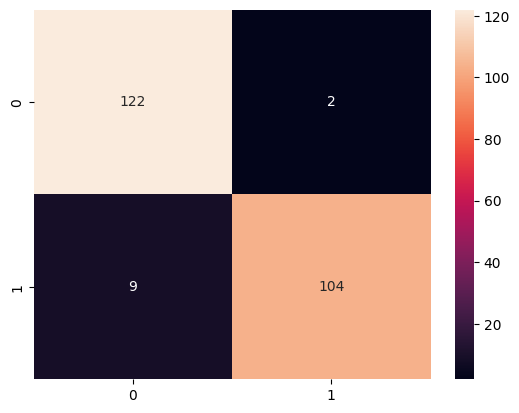

In [106]:
conf_matrix(rf)

In [108]:
report(rf)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       124
           1       0.98      0.92      0.95       113

    accuracy                           0.95       237
   macro avg       0.96      0.95      0.95       237
weighted avg       0.96      0.95      0.95       237



In [109]:
bc = BaggingClassifier()

In [110]:
kfold(bc,'Bagging Classifier')

Cross Validation Score of Bagging Classifier is: 0.922354124748491


In [111]:
train(bc,'Bagging Classifier')

Bagging Classifier:
Training Score: 0.9943582510578279
Testing Score: 0.9367088607594937


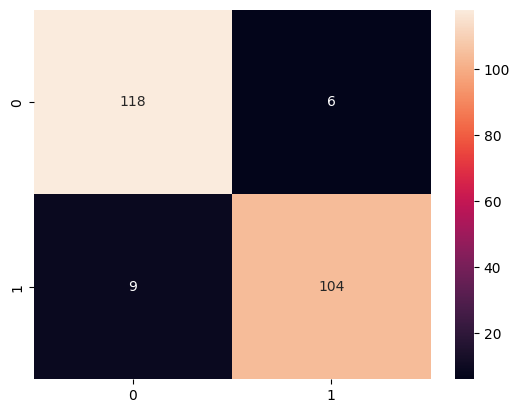

In [114]:
conf_matrix(bc)

In [115]:
report(bc)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       124
           1       0.95      0.92      0.93       113

    accuracy                           0.94       237
   macro avg       0.94      0.94      0.94       237
weighted avg       0.94      0.94      0.94       237



In [116]:
xgb = XGBClassifier()

In [117]:
kfold(xgb,'XGBClassifier')
train(xgb,'XGBClassifier')

Cross Validation Score of XGBClassifier is: 0.9350301810865191
XGBClassifier:
Training Score: 1.0
Testing Score: 0.9367088607594937


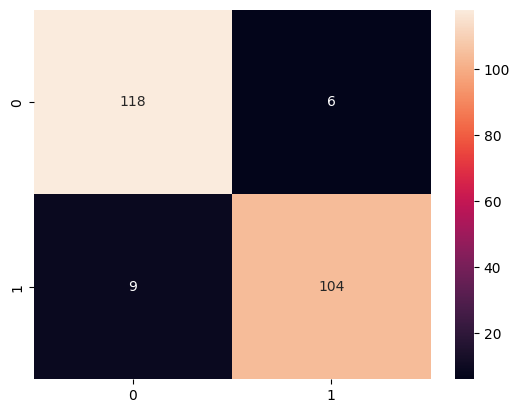

In [118]:
conf_matrix(xgb)

In [119]:
report(xgb)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       124
           1       0.95      0.92      0.93       113

    accuracy                           0.94       237
   macro avg       0.94      0.94      0.94       237
weighted avg       0.94      0.94      0.94       237



In [123]:
def eval(model,model_name):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm [1][1] 
    acc = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (fp + tn)
    npv = tn / (tn + fp)
    fpr = fp/(fp+tn)
    fnr = fn/(tp+fn)
    fdr = fp/(tp+fp)
    print(f"Accuarcy of {model_name}: {acc}")
    print(f"Precision Accuarcy of {model_name}: {precision}")
    print(f"Specificity Accuarcy of {model_name}: {specificity}")
    print(f"Negative predictive value Accuarcy of {model_name}: {npv}")
    print(f"Fall out Accuarcy of {model_name}: {fpr}")
    print(f"False negative rate Accuarcy of {model_name}: {fnr}")
    print(f"False discovery rate Accuarcy of {model_name}: {fdr}")

In [124]:
eval(lg,'Logistic Regression')

Accuarcy of Logistic Regression: 0.9409282700421941
Precision Accuarcy of Logistic Regression: 0.9596774193548387
Specificity Accuarcy of Logistic Regression: 0.9541284403669725
Negative predictive value Accuarcy of Logistic Regression: 0.9541284403669725
Fall out Accuarcy of Logistic Regression: 0.045871559633027525
False negative rate Accuarcy of Logistic Regression: 0.0703125
False discovery rate Accuarcy of Logistic Regression: 0.04032258064516129


In [125]:
eval(rf,'Random Forest')

Accuarcy of Random Forest: 0.9535864978902954
Precision Accuarcy of Random Forest: 0.9838709677419355
Specificity Accuarcy of Random Forest: 0.9811320754716981
Negative predictive value Accuarcy of Random Forest: 0.9811320754716981
Fall out Accuarcy of Random Forest: 0.018867924528301886
False negative rate Accuarcy of Random Forest: 0.06870229007633588
False discovery rate Accuarcy of Random Forest: 0.016129032258064516


In [126]:
eval(dt,'Decision Tree')

Accuarcy of Decision Tree: 0.9282700421940928
Precision Accuarcy of Decision Tree: 0.9354838709677419
Specificity Accuarcy of Decision Tree: 0.9285714285714286
Negative predictive value Accuarcy of Decision Tree: 0.9285714285714286
Fall out Accuarcy of Decision Tree: 0.07142857142857142
False negative rate Accuarcy of Decision Tree: 0.072
False discovery rate Accuarcy of Decision Tree: 0.06451612903225806


In [127]:
eval(bc,'Bagging Classifier')

Accuarcy of Bagging Classifier: 0.9367088607594937
Precision Accuarcy of Bagging Classifier: 0.9516129032258065
Specificity Accuarcy of Bagging Classifier: 0.9454545454545454
Negative predictive value Accuarcy of Bagging Classifier: 0.9454545454545454
Fall out Accuarcy of Bagging Classifier: 0.05454545454545454
False negative rate Accuarcy of Bagging Classifier: 0.07086614173228346
False discovery rate Accuarcy of Bagging Classifier: 0.04838709677419355


In [128]:
eval(xgb,'XGBClassifier')

Accuarcy of XGBClassifier: 0.9367088607594937
Precision Accuarcy of XGBClassifier: 0.9516129032258065
Specificity Accuarcy of XGBClassifier: 0.9454545454545454
Negative predictive value Accuarcy of XGBClassifier: 0.9454545454545454
Fall out Accuarcy of XGBClassifier: 0.05454545454545454
False negative rate Accuarcy of XGBClassifier: 0.07086614173228346
False discovery rate Accuarcy of XGBClassifier: 0.04838709677419355
